### EXAMEN FINAL
$\textbf{Data Science and Machine Learning Applied to Financial Markets}$

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio completo que maximice tu utilidad.  

Considera una tasa libre de riesgo de 5.0%  
Un premio por riesgo de mercado de 10.0%  
Un nivel de aversión al riesgo A=3

Para las 7 acciones seleccionadas, calcula:
1. Rendimiento esperado diario y anual bajo los siguientes modelos:  
a. Modelo de rendimiento promedio constante  
b. Modelo CAPM  
i. ¿Cuál es la beta de cada acción?  
ii. Clasifica las acciones en defensivas y agresivas  
2. Matriz varianza - covarianza  
Utilizando los rendimientos esperados bajo el modelo CAPM, construye:  
3. Frontera de carteras de mínima varianza y frontera eficiente / graficar  
4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)  
5. Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo  

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import statsmodels.api as sm

In [6]:
#Cargamos información de precios
market=pd.read_excel("Prueba.xlsx", index_col=0)

In [31]:
#Calculamos el cambio y limpiamos el nombre de cada uno de los emisores e índices
rets=market.pct_change() .dropna(axis=0)
rets.columns=[col.replace("MF Equity", "") for col in rets.columns]
rets.columns=[col.replace(" ", "") for col in rets.columns]

#Seleccionamos las siguientes acciones
rets=rets[["WALMEX*", "IENOVA*", "CUERVO*", "ELEKTRA*", "BIMBOA", "ALSEA*", "GFNORTEO", "MEXBOLINDEX"]]
#Acciones seleccionadas
i=0
for c in rets.columns[:-1]:
    i+=1
    print(f"Acción {i}: {c}")
    
#Longitud de cada vector
N=len(rets)

Acción 1: WALMEX*
Acción 2: IENOVA*
Acción 3: CUERVO*
Acción 4: ELEKTRA*
Acción 5: BIMBOA
Acción 6: ALSEA*
Acción 7: GFNORTEO


### 1. Rendimiento diario y anual

$\textbf{a. Modelo de rendimiento promedio constante}$

In [17]:
#Rendimiento diario
rend_ports_d = rets.mean()
#Rendimiento anual
rend_ports_a = rets.mean()*252

print(f'Rendimientos diarios:\n{rend_ports_d}\n\n')
print(f'Rendimientos anuales:\n{rend_ports_a}\n')

Rendimientos diarios:
WALMEX*        0.000493
IENOVA*        0.000153
CUERVO*        0.000200
ELEKTRA*       0.000987
BIMBOA        -0.000281
ALSEA*        -0.000299
GFNORTEO       0.000193
MEXBOLINDEX   -0.000111
dtype: float64


Rendimientos anuales:
WALMEX*        0.124216
IENOVA*        0.038623
CUERVO*        0.050462
ELEKTRA*       0.248633
BIMBOA        -0.070693
ALSEA*        -0.075260
GFNORTEO       0.048631
MEXBOLINDEX   -0.027950
dtype: float64



$\textbf{b. Modelo CAPM}$

In [43]:
#Definimos parámetros iniciales
#Tasa libre de riesgo anual
tLR_a=0.05
#Tasa libre de riesgo diaria
tLR_d=tLR_a/252
#Premio anual
premio_a=0.1
#Premio diario
premio_d=premio_a/252
#índice de mercado
index = rets[["MEXBOLINDEX"]].iloc[:,-1]

i. ¿Cuál es la beta de cada acción?  
ii. Clasifica las acciones en defensivas y agresivas

In [75]:
#Calculamos betas
Y = sm.add_constant(index-(tLR_d))
b=[]
for i in rets.columns:
    m = sm.OLS(rets[i]-(tLR_d),Y).fit()
    b.append(m.params[1])
#Calculamos rendimientos diarios y anuales: Asumimos una posición
df=pd.DataFrame({"accion":rets.columns[:-1],"Beta": b[:-1]})
df["rendimientoDiario"] = (tLR_d) + df["Beta"]*(premio_d)
df["rendimientoAnual"] = df["rendimientoDiario"]*252
df["posicion"] = np.where(df['Beta']>1, 'agresiva', 'defensiva')
df

,accion,Beta,rendimientoDiario,rendimientoAnual,posicion
0,WALMEX*,0.884332,0.000549,0.138433,defensiva
1,IENOVA*,0.871632,0.000544,0.137163,defensiva
2,CUERVO*,0.348421,0.000337,0.084842,defensiva
3,ELEKTRA*,0.405733,0.000359,0.090573,defensiva
4,BIMBOA,0.884697,0.000549,0.138470,defensiva
5,ALSEA*,0.792074,0.000513,0.129207,defensiva
6,GFNORTEO,1.595640,0.000832,0.209564,agresiva


### 2. Matriz varianza - covarianza

In [85]:
rets[["WALMEX*", "IENOVA*", "CUERVO*", "ELEKTRA*", "BIMBOA", "ALSEA*", "GFNORTEO"]].cov()

,WALMEX*,IENOVA*,CUERVO*,ELEKTRA*,BIMBOA,ALSEA*,GFNORTEO
WALMEX*,0.000219,0.000052,0.000026,0.000030,0.000051,0.000049,0.000089
IENOVA*,0.000052,0.000261,0.000029,0.000029,0.000052,0.000064,0.000100
CUERVO*,0.000026,0.000029,0.000217,0.000013,0.000025,0.000037,0.000044
ELEKTRA*,0.000030,0.000029,0.000013,0.000318,0.000048,0.000025,0.000025
BIMBOA,0.000051,0.000052,0.000025,0.000048,0.000234,0.000067,0.000075
ALSEA*,0.000049,0.000064,0.000037,0.000025,0.000067,0.000241,0.000088
GFNORTEO,0.000089,0.000100,0.000044,0.000025,0.000075,0.000088,0.000381


### 3. Frontera de carteras de mínima varianza y frontera eficiente / graficar  

In [257]:
#Definimos funciones para evaluar el rendimiento esperado y la volatilidad
def port_rend(weights, r):
    E_p = (rendCAPM @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

#Pesos aleatorios para las siete acciones
weights = np.random.random(7)
weights /= sum(weights)
weights, sum(weights)

#Rendimientos calculados en el CAPM
rendCAPM = df['rendimientoDiario']
rend=rets[["WALMEX*", "IENOVA*", "CUERVO*", "ELEKTRA*", "BIMBOA", "ALSEA*", "GFNORTEO"]]
#Rendimiento y volatilidad con pesos aleatorios
port_rend(weights, rend), port_vol(weights, rend)


(0.13990114078238824, 0.15370078756561065)

In [258]:
#Simulación de pesos de portafolios
weights_sim = np.random.random((5000,7))
weights_sim=weights_sim/weights_sim.sum(axis=1, keepdims=True)

#Simulación de rendimientos
rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rend)
#Simulación de volatilidad
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rend)
#Sharpe Ratio
sharpe_ratio = rend_sim / vol_sim

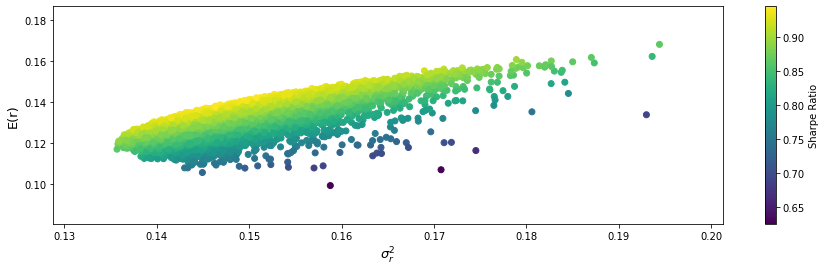

In [282]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [260]:
#Para crear la frontera eficiente
N, M = rend.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend) - E # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.13510390215123547
     jac: array([0.13480325, 0.13485599, 0.13529877, 0.13524322, 0.13534512,
       0.13493995, 0.13531136])
 message: 'Optimization terminated successfully.'
    nfev: 91
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.17965751, 0.12964646, 0.24442089, 0.15635604, 0.14235533,
       0.12978668, 0.01777708])

In [261]:
w_prt0 = port0.x
port_rend(w_prt0,rend),port_vol(w_prt0,rend), w_prt0

(0.1177588951718229,
 0.13510390215123547,
 array([0.17965751, 0.12964646, 0.24442089, 0.15635604, 0.14235533,
        0.12978668, 0.01777708]))

In [262]:
#Rango de frontera
r_min=port_rend(w_prt0, rend)
r_max=rend_ports_a.max()
rend_max = np.linspace(r_min, r_max)

#Generamos pesos optimos
pesos_optimos = []
for e in rend_max:
    
    constraints=[
    {"type":"eq", "fun": sum_weights}, 
    {"type":"eq", "fun": lambda w: rend_esperado(w, e)}
]

    port1 = minimize(port_vol , w0 ,constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

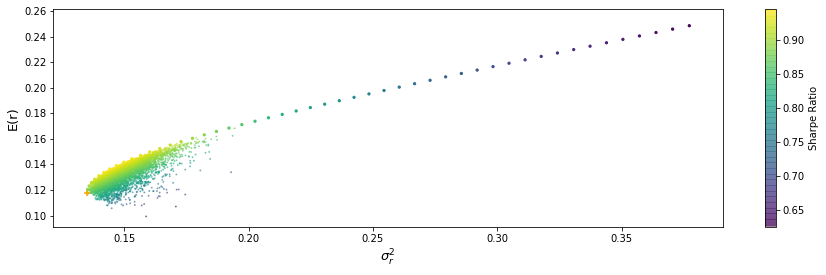

In [283]:
r_opt = []
v_opt = []

for w in pesos_optimos:
    r_opt.append(port_rend(w,rend))
    v_opt.append(port_vol(w,rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
plt.scatter(v_opt,r_opt, c= r_opt/v_opt,s=5)
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio, alpha = 0.5, s=0.9)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);
plt.scatter(port_vol(w_prt0,rend),port_rend(w_prt0,rend),c="orange", marker="+")

### 4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)  

In [264]:
w0 = np.random.randn(M)

def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - tLR_a)/(port_vol(weights,rend))

constraints = [
    {"type": "eq","fun":sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints = constraints)
w_sharpe = f_sharpe.x
e_sharpe = port_rend(w_sharpe,rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c = np.linspace(0,0.25)
sharpe = tLR_a + sigma_c * (e_sharpe - tLR_a) / vol_sharpe

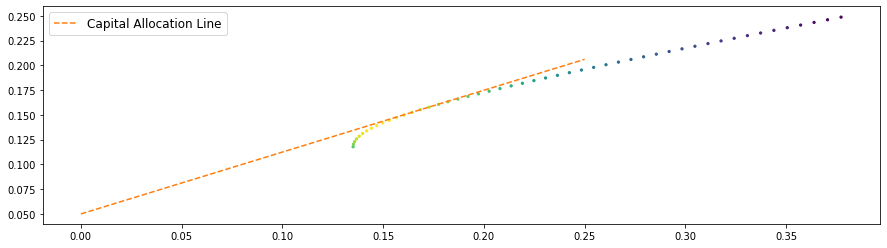

In [284]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.scatter(v_opt, r_opt, c= r_opt/v_opt,s=5)
plt.legend(fontsize=12)

### 5. Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo  

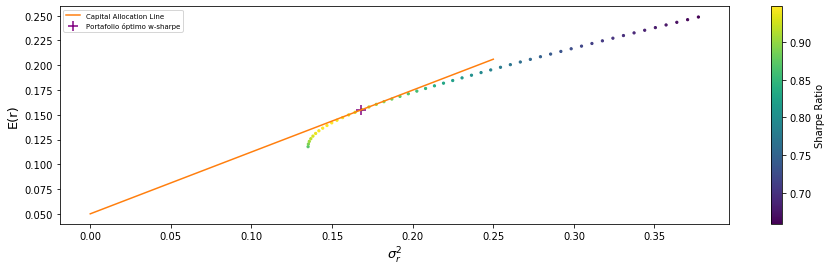

In [279]:
plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
plt.plot(sigma_c,sharpe, linestyle = "-", c= "tab:orange",label = "Capital Allocation Line")
plt.scatter(v_opt,r_opt, c= r_opt/v_opt,s=5)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);
plt.scatter(port_vol(w_sharpe,rend),port_rend(w_sharpe,rend),c="purple",label="Portafolio óptimo w-sharpe",s=100,  marker="+")
plt.legend(fontsize=7, loc ='upper left' );

In [281]:
pd.DataFrame({"accion": rend.columns.values,"pesosOptimos":w_sharpe*100})

,accion,pesosOptimos
0,WALMEX*,20.145960
1,IENOVA*,13.072931
2,CUERVO*,2.693871
3,ELEKTRA*,4.359234
4,BIMBOA,19.456533
5,ALSEA*,10.474034
6,GFNORTEO,29.797437


# Deep Learning

### 6. ¿En qué escenarios ocuparías una red neuronal? 

##### Si enfrentara alguno de los siguientes problemas de reconocimiento y aprendizaje de patrones con un gran volumen de datos:
Análisis de sentimiento  
Generación de texto  
Máquinas de traducción neuronal  
Clasificación de imágenes  

### 7. ¿En qué escenarios no ocuparías una red neuronal? 

Cuando no se necesita generar un modelo predictivo. Por ejemplo, en un análisis exploratorio.  
Cuando no tenemos gran cantidad de datos.

### 8. Menciona tres funciones de activación para una red neuronal feed-forward

Sigmoide  
Tangente Hiperbólica  
ReLu  
Softmax

### 9. ¿Qué es el método de backpropagation?

Es un método para entrenar redes neuronales el cual consiste en una vez que se ha aplicado un patrón a la entrada de la red como estímulo, este se propaga desde la primera capa a través de las capas siguientes de la red, hasta generar una salida. La señal de salida se compara con la salida deseada y se calcula una señal de error para cada una de las salidas.

### 10. ¿En qué difiere una red neuronal feed - forward de una red neuronal convolucional?  

En una red neuronal feed-forward las neuronas estan conectados en dirección hacia adelante con la siguiente capa o output aplicando una función de activación, mientras que en las redes convolucionales antes de aplicar la función aplicamos un kernel convolucional.